In [1]:
from models import model, train_model
from torchvision.models import resnet50, ResNet50_Weights
from torchvision.datasets import ImageFolder
from sklearn.model_selection import train_test_split
from torch.utils.data import Subset
import numpy as np
np.random.seed(0)
from torchmetrics import Accuracy, Precision, Recall, F1Score
from sklearn.metrics import confusion_matrix
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import torch

e:\Anaconda\envs\Babylon\Lib\site-packages\torchaudio\backend\utils.py:74: UserWarning: No audio backend is available.
  warnings.warn("No audio backend is available.")


In [2]:
resnet_50 = model.Model(resnet50(ResNet50_Weights.IMAGENET1K_V2).to('cuda'))


e:\Anaconda\envs\Babylon\Lib\site-packages\torchvision\models\_utils.py:135: UserWarning: Using 'weights' as positional parameter(s) is deprecated since 0.13 and may be removed in the future. Please use keyword parameter(s) instead.
  warnings.warn(
Downloading: "https://download.pytorch.org/models/resnet50-11ad3fa6.pth" to C:\Users\vasya/.cache\torch\hub\checkpoints\resnet50-11ad3fa6.pth
100%|██████████| 97.8M/97.8M [00:03<00:00, 25.7MB/s]


In [2]:
data = ImageFolder('data_retrieval/data_full', ResNet50_Weights.IMAGENET1K_V2.transforms())

In [3]:
targets = data.targets
train_indices, test_val_indices = train_test_split(np.arange(len(targets)), stratify=targets, train_size=0.65, random_state=21)
train_data = Subset(data, indices=train_indices)
val_test_data = Subset(data, indices=test_val_indices)
targets = np.array(targets)
test_val_targets = targets[test_val_indices]
test_indices, val_indices = train_test_split(test_val_indices, stratify=test_val_targets, train_size=0.57, random_state=21)
val_data, test_data = Subset(data, indices=val_indices), Subset(data, indices=test_indices)

In [5]:
print("Length of train set:", len(train_data))
print("Length of val set:", len(val_data))
print("Length of test set:", len(test_data))

Length of train set: 14528
Length of val set: 3365
Length of test set: 4459


In [6]:
train_model.train_model(train_data,val_data , resnet_50, f'models/models_weights/resnet_50.pth', epochs=100, tol=10)

  1%|          | 1/100 [03:42<6:07:16, 222.59s/it]

Epoch 1 		 Training Loss: 1.8427991064240754 		 Validation Loss: 1.071152741451399
Validation Loss Decreased(inf--->226.013228) 	 Saving The Model
Epoch 2 		 Training Loss: 0.8788046253771247 		 Validation Loss: 0.8298938534977311
Validation Loss Decreased(226.013228--->175.107603) 	 Saving The Model


  3%|▎         | 3/100 [11:29<6:12:14, 230.25s/it]

Epoch 3 		 Training Loss: 0.6295516384429081 		 Validation Loss: 0.8306981529246009


  4%|▍         | 4/100 [15:04<5:59:03, 224.41s/it]

Epoch 4 		 Training Loss: 0.49378084057392263 		 Validation Loss: 0.8020721816268013
Validation Loss Decreased(175.107603--->169.237230) 	 Saving The Model
Epoch 5 		 Training Loss: 0.3987164110938161 		 Validation Loss: 0.7261639822857074
Validation Loss Decreased(169.237230--->153.220600) 	 Saving The Model


  6%|▌         | 6/100 [22:42<5:55:37, 226.99s/it]

Epoch 6 		 Training Loss: 0.2957621510048286 		 Validation Loss: 0.7814783170748661


  7%|▋         | 7/100 [26:36<5:55:09, 229.13s/it]

Epoch 7 		 Training Loss: 0.2366875112066989 		 Validation Loss: 0.7469288672174887


  8%|▊         | 8/100 [30:25<5:51:23, 229.17s/it]

Epoch 8 		 Training Loss: 0.17771208859669324 		 Validation Loss: 0.7901298783684229


  9%|▉         | 9/100 [34:16<5:48:31, 229.80s/it]

Epoch 9 		 Training Loss: 0.14300161083026314 		 Validation Loss: 0.8379384172612457


 10%|█         | 10/100 [38:08<5:45:35, 230.39s/it]

Epoch 10 		 Training Loss: 0.11539393905327155 		 Validation Loss: 0.8453410749204492


 11%|█         | 11/100 [42:06<5:45:16, 232.77s/it]

Epoch 11 		 Training Loss: 0.10384856460647789 		 Validation Loss: 0.862452431030183


 12%|█▏        | 12/100 [46:00<5:42:02, 233.21s/it]

Epoch 12 		 Training Loss: 0.08952185904641409 		 Validation Loss: 0.8872794714442926


 13%|█▎        | 13/100 [49:56<5:39:01, 233.81s/it]

Epoch 13 		 Training Loss: 0.07768655217256262 		 Validation Loss: 0.8596180716962046


 14%|█▍        | 14/100 [53:49<5:34:51, 233.62s/it]

Epoch 14 		 Training Loss: 0.07690498354766669 		 Validation Loss: 0.7713404020771243


 14%|█▍        | 14/100 [57:46<5:54:55, 247.62s/it]

Epoch 15 		 Training Loss: 0.06492583436398082 		 Validation Loss: 0.9328845205288645
Training stopped


In [4]:
idx_to_class = {v: k for k, v in test_data.dataset.class_to_idx.items()}

In [5]:
test_loader = torch.utils.data.DataLoader(test_data,
                                             batch_size=16, shuffle=True,
                                             num_workers=4)

In [6]:
resnet_50 = resnet50()
resnet_50.load_state_dict(torch.load('models/models_weights/resnet_50.pth'))
resnet_50.eval()
resnet_50.to('cuda')

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [8]:
correct_pred = {classname: 0 for classname in idx_to_class}
total_pred = {classname: 0 for classname in idx_to_class}
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        images = images.to('cuda')
        labels = labels.to('cuda')
        outputs = resnet_50(images)
        _, predictions = torch.max(outputs, 1)
        for label, prediction in zip(labels, predictions):
            if idx_to_class[int(label)] == idx_to_class[(int(prediction))]:
                correct_pred[int(label)] += 1
            total_pred[int(label)] += 1

In [9]:
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print(f'Accuracy for class: {idx_to_class[classname]:5s} is {accuracy:.1f} %')

Accuracy for class: AN_Neo-Assyrian is 77.8 %
Accuracy for class: AN_Neo-Babylonian is 90.6 %
Accuracy for class: A_Neo-Assyrian is 83.1 %
Accuracy for class: A_Neo-Babylonian is 88.0 %
Accuracy for class: AŠ_Neo-Assyrian is 58.7 %
Accuracy for class: AŠ_Neo-Babylonian is 91.7 %
Accuracy for class: BAD_Neo-Assyrian is 89.1 %
Accuracy for class: BAD_Neo-Babylonian is 87.3 %
Accuracy for class: DIŠ_Neo-Assyrian is 85.7 %
Accuracy for class: DIŠ_Neo-Babylonian is 91.5 %
Accuracy for class: E_Neo-Assyrian is 46.4 %
Accuracy for class: E_Neo-Babylonian is 88.5 %
Accuracy for class: GAR_Neo-Assyrian is 82.4 %
Accuracy for class: GAR_Neo-Babylonian is 75.6 %
Accuracy for class: GIŠ_Neo-Assyrian is 81.1 %
Accuracy for class: GIŠ_Neo-Babylonian is 73.8 %
Accuracy for class: IGI_Neo-Assyrian is 72.3 %
Accuracy for class: IGI_Neo-Babylonian is 88.0 %
Accuracy for class: I_Neo-Assyrian is 79.3 %
Accuracy for class: I_Neo-Babylonian is 88.3 %
Accuracy for class: KA_Neo-Assyrian is 80.6 %
Accuracy f

In [10]:
print("Overall accuracy: ",sum(correct_pred.values()) / sum(total_pred.values()))

Overall accuracy:  0.8246243552366002


In [11]:
true_values = torch.zeros(len(test_data), dtype=torch.int64)
preds = torch.zeros(len(test_data), 1000)
counter = 0
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        images = images.to('cuda')
        labels = labels.to('cuda')
        outputs = resnet_50(images)
        for pred,label  in zip(outputs, labels):
            preds[counter] = pred
            true_values[counter] = int(label)
            counter += 1
            

In [12]:
accuracy_2 = Accuracy('multiclass', num_classes=1000, top_k=2)
accuracy_3 = Accuracy('multiclass', num_classes=1000, top_k=3)
precision = Precision('multiclass', num_classes=1000)
recall = Recall('multiclass', num_classes=1000)
f1 = F1Score('multiclass', num_classes=1000)
f1_score = f1(preds, true_values)
prec = precision(preds, true_values)
rec = recall(preds, true_values)
top_2 = accuracy_2(preds, true_values)
top_3 = accuracy_3(preds, true_values)

print("Overall Top-2 accuracy: ",float(top_2))
print("Overall Top-3 accuracy: ",float(top_3))
print("Overall  precision: ",float(prec))
print("Overall  recall: ",float(rec))
print("F1 Score:", float(f1_score))


Overall Top-2 accuracy:  0.907826840877533
Overall Top-3 accuracy:  0.9385512471199036
Overall  precision:  0.8246243596076965
Overall  recall:  0.8246243596076965
F1 Score: 0.8246243596076965


<Axes: >

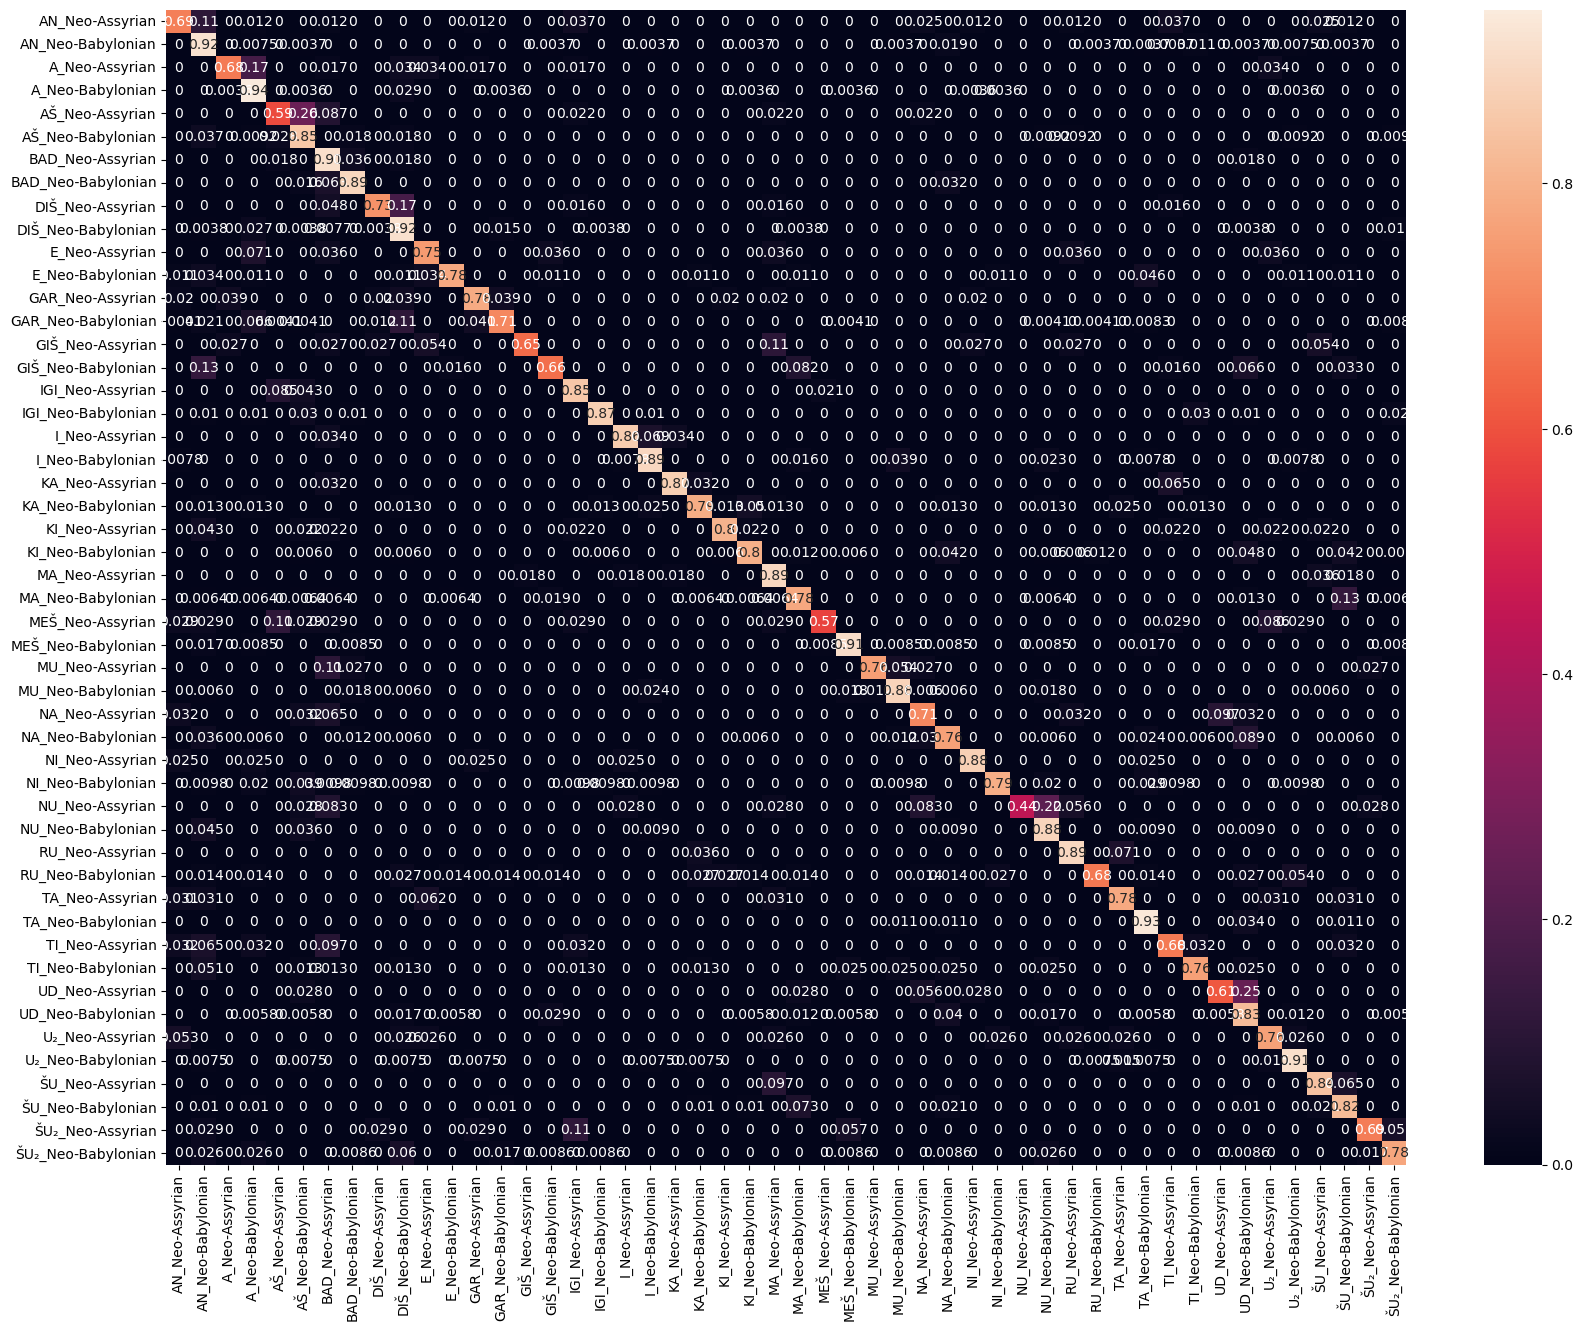

In [45]:
cf_matrix = confusion_matrix(true_values, torch.max(preds,1)[1])
df_cm = pd.DataFrame(cf_matrix / np.sum(cf_matrix, axis=1)[:, None], index = [idx_to_class[i] for i in idx_to_class],
                    columns = [idx_to_class[i] for i in idx_to_class])
plt.figure(figsize = (20,15))
sn.heatmap(df_cm, annot=True)